#### Predicting general diseases using Machine Learning

About the dataset:
LINK: https://drive.google.com/drive/folders/1MzTEsh9UxYgmQGcC0A3mlUcNC9fq1yu_?usp=sharing

A training dataset was collected which included 4920 rows and 133 columns. The target value is prognosis.

Rows: Information about symptoms observed in 4920 patients

Columns: Names of 132 symptoms and the last column included prognosis of every patient.

A testing dataset was collected which included 8 rows and 132 columns.


Expected Outcome: The task is to predict the disease with high accuracy rate with the help of list of symptoms provided by patient. Also to see which ML model performs the best for which disease and hence, make a comparitive study.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Packages

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import os

## Reading the CSV file

In [0]:
df0 = pd.read_csv("/content/drive/My Drive/General Disease Training set.csv")
print("Dataset with rows {} and columns {}".format(df0.shape[0],df0.shape[1]))
df0.head()

Dataset with rows 4920 and columns 133


itching  skin_rash  ...  yellow_crust_ooze         prognosis
0        1          1  ...                  0  Fungal infection
1        0          1  ...                  0  Fungal infection
2        1          0  ...                  0  Fungal infection
3        1          1  ...                  0  Fungal infection
4        1          1  ...                  0  Fungal infection

[5 rows x 133 columns]

In [0]:
df1 = pd.read_csv("/content/drive/My Drive/General Disease Testing dataset.csv")
print("Dataset with rows {} and columns {}".format(df1.shape[0],df1.shape[1]))
df1.head()

Dataset with rows 41 and columns 133


itching  skin_rash  ...  yellow_crust_ooze            prognosis
0        1          1  ...                  0     Fungal infection
1        0          0  ...                  0              Allergy
2        0          0  ...                  0                 GERD
3        1          0  ...                  0  Chronic cholestasis
4        1          1  ...                  0        Drug Reaction

[5 rows x 133 columns]

In [0]:
df0.describe()

itching    skin_rash  ...  red_sore_around_nose  yellow_crust_ooze
count  4920.000000  4920.000000  ...           4920.000000        4920.000000
mean      0.137805     0.159756  ...              0.023171           0.023171
std       0.344730     0.366417  ...              0.150461           0.150461
min       0.000000     0.000000  ...              0.000000           0.000000
25%       0.000000     0.000000  ...              0.000000           0.000000
50%       0.000000     0.000000  ...              0.000000           0.000000
75%       0.000000     0.000000  ...              0.000000           0.000000
max       1.000000     1.000000  ...              1.000000           1.000000

[8 rows x 132 columns]

##Data Analysis

In [0]:
df0.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

Hence, there are no missing values.

In [0]:
# Training data
df0.prognosis.value_counts()

Dimorphic hemmorhoids(piles)               120
Arthritis                                  120
Acne                                       120
Osteoarthristis                            120
Tuberculosis                               120
hepatitis A                                120
Alcoholic hepatitis                        120
Dengue                                     120
Bronchial Asthma                           120
Hepatitis B                                120
Cervical spondylosis                       120
Urinary tract infection                    120
Hypertension                               120
Hepatitis D                                120
Diabetes                                   120
Hypothyroidism                             120
Psoriasis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Migraine                                   120
Peptic ulcer diseae                        120
Hepatitis E                                120
Impetigo     

In [0]:
# Testing data
df1.prognosis.value_counts()

Diabetes                                   1
Hypertension                               1
Common Cold                                1
Hepatitis D                                1
Varicose veins                             1
Typhoid                                    1
Psoriasis                                  1
Chicken pox                                1
Hypothyroidism                             1
Gastroenteritis                            1
AIDS                                       1
Hepatitis B                                1
(vertigo) Paroymsal  Positional Vertigo    1
Tuberculosis                               1
Fungal infection                           1
GERD                                       1
Paralysis (brain hemorrhage)               1
hepatitis A                                1
Hepatitis E                                1
Migraine                                   1
Drug Reaction                              1
Impetigo                                   1
Jaundice  

In [0]:
df0.prognosis.value_counts(normalize=True)

Dimorphic hemmorhoids(piles)               0.02439
Arthritis                                  0.02439
Acne                                       0.02439
Osteoarthristis                            0.02439
Tuberculosis                               0.02439
hepatitis A                                0.02439
Alcoholic hepatitis                        0.02439
Dengue                                     0.02439
Bronchial Asthma                           0.02439
Hepatitis B                                0.02439
Cervical spondylosis                       0.02439
Urinary tract infection                    0.02439
Hypertension                               0.02439
Hepatitis D                                0.02439
Diabetes                                   0.02439
Hypothyroidism                             0.02439
Psoriasis                                  0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Migraine                                   0.02439
Peptic ulcer diseae            

### Thus, the Training dataset is balanced with respect to Target variable: Prognosis.

In [0]:
df1.prognosis.value_counts(normalize=True)

Diabetes                                   0.02439
Hypertension                               0.02439
Common Cold                                0.02439
Hepatitis D                                0.02439
Varicose veins                             0.02439
Typhoid                                    0.02439
Psoriasis                                  0.02439
Chicken pox                                0.02439
Hypothyroidism                             0.02439
Gastroenteritis                            0.02439
AIDS                                       0.02439
Hepatitis B                                0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Tuberculosis                               0.02439
Fungal infection                           0.02439
GERD                                       0.02439
Paralysis (brain hemorrhage)               0.02439
hepatitis A                                0.02439
Hepatitis E                                0.02439
Migraine                       

### Also, the Testing dataset is balanced too with respect to Target variable:Prognosis

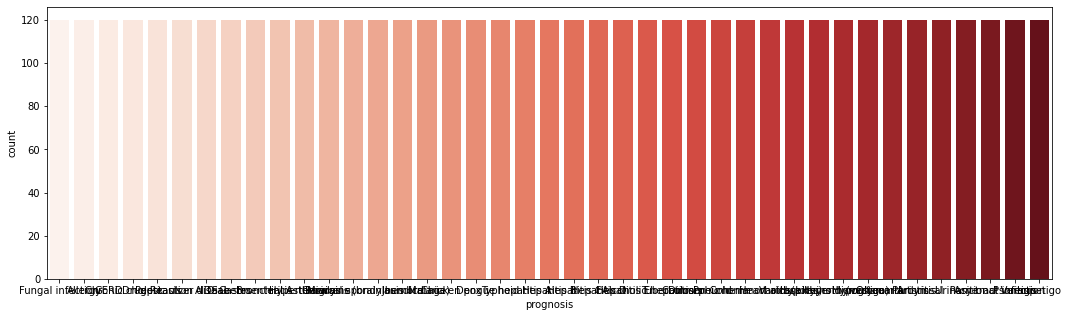

In [0]:
plt.figure(figsize=(18,5))
sns.countplot('prognosis',data=df0,palette="Reds")
plt.show()

In [0]:
X= df0.drop(["prognosis"],axis=1)
y = df0['prognosis']

In [0]:
X1= df1.drop(["prognosis"],axis=1)
y1 = df1['prognosis']

In [0]:
df0=df0.drop(columns='fluid_overload.1')

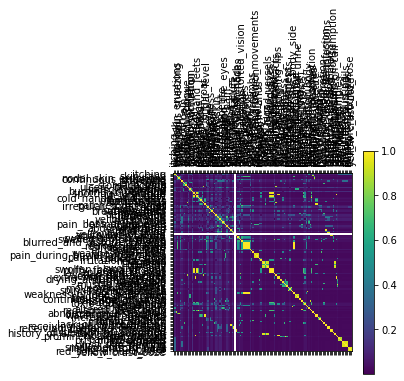

In [0]:
import matplotlib.pyplot as plt
wcorr = df0.corr() 
plt.matshow(wcorr.abs()) 
plt.colorbar() 
plt.xticks(range(len(wcorr.columns)), wcorr.columns, rotation='vertical')
plt.yticks(range(len(wcorr.columns)), wcorr.columns)
#Another way of displaying the correlations 
wcorr.abs().style.background_gradient() 

In [0]:


# Create correlation matrix
corr_matrix = df0.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [0]:
to_drop

['redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'enlarged_thyroid',
 'brittle_nails',
 'swollen_extremeties',
 'slurred_speech',
 'loss_of_smell',
 'abnormal_menstruation',
 'increased_appetite',
 'polyuria',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections',
 'coma',
 'stomach_bleeding',
 'palpitations']

In [0]:
df0=df0.drop(df0[to_drop], axis=1)


In [0]:
df0.isnull().sum()


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 115, dtype: int64

In [0]:
df0.describe()

itching    skin_rash  ...  red_sore_around_nose  yellow_crust_ooze
count  4920.000000  4920.000000  ...           4920.000000        4920.000000
mean      0.137805     0.159756  ...              0.023171           0.023171
std       0.344730     0.366417  ...              0.150461           0.150461
min       0.000000     0.000000  ...              0.000000           0.000000
25%       0.000000     0.000000  ...              0.000000           0.000000
50%       0.000000     0.000000  ...              0.000000           0.000000
75%       0.000000     0.000000  ...              0.000000           0.000000
max       1.000000     1.000000  ...              1.000000           1.000000

[8 rows x 114 columns]

In [0]:
df0.describe

<bound method NDFrame.describe of       itching  ...                                prognosis
0           1  ...                         Fungal infection
1           0  ...                         Fungal infection
2           1  ...                         Fungal infection
3           1  ...                         Fungal infection
4           1  ...                         Fungal infection
...       ...  ...                                      ...
4915        0  ...  (vertigo) Paroymsal  Positional Vertigo
4916        0  ...                                     Acne
4917        0  ...                  Urinary tract infection
4918        0  ...                                Psoriasis
4919        0  ...                                 Impetigo

[4920 rows x 115 columns]>

## Data Visualization

## PCA

In [0]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [0]:
from sklearn.preprocessing import StandardScaler

Xscale = StandardScaler().fit_transform(X)

In [0]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(Xscale)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (4920, 2)


### PCA for Data visualization

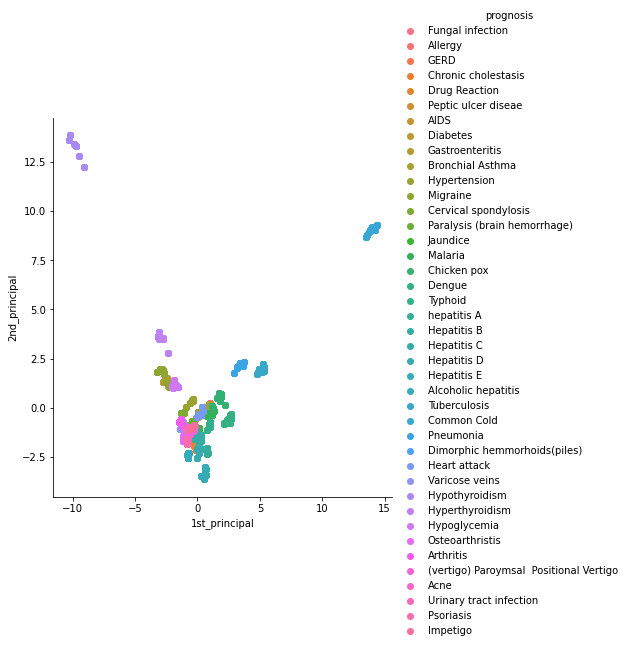

In [0]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, y)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "prognosis"))
sns.FacetGrid(pca_df, hue="prognosis", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

#### From this we can easily classify the disease using PCA.

### PCA for dimensionality reduction

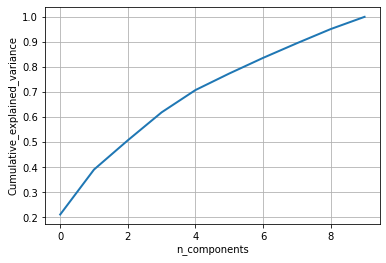

In [0]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 10
pca_data = pca.fit_transform(X)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

#### Although explained Variance is not a good metric for classification problem but it gives fair-enough idea about dataset.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Import Metrics

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Model Building

In [0]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.33, random_state=42)

### Random Forest Classifier

In [0]:
rfc_mod = RandomForestClassifier(random_state=42, class_weight='balanced').fit(train_X, train_y)

In [0]:
y_pred_rfc = rfc_mod.predict(val_X)
y_pred_rfc

array(['Acne', 'Acne', 'Hyperthyroidism', ..., 'Hepatitis D',
       'Hypertension ', 'Arthritis'], dtype=object)

In [0]:
y_pred_rfc1 = rfc_mod.predict(X1)
y_pred_rfc1

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [0]:
print("Accuracy Score:", accuracy_score(y_pred_rfc, val_y))
print('cross validation:',cross_val_score(rfc_mod, X, y, cv=3).mean())
print("F1 Score :",f1_score(y_pred_rfc,val_y,average = "weighted"))
print('Report:\n',classification_report(val_y, y_pred_rfc))
print('Confusion Matrix: \n',confusion_matrix(val_y, y_pred_rfc))

Accuracy Score: 1.0
cross validation: 1.0
F1 Score : 1.0
Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold   

In [0]:
print("Accuracy Score:", accuracy_score(y_pred_rfc1, y1))
print('cross validation:',cross_val_score(rfc_mod, X, y, cv=3).mean())
print("F1 Score :",f1_score(y_pred_rfc,val_y,average = "weighted"))
print('Report:\n',classification_report(val_y, y_pred_rfc))
print('Confusion Matrix: \n',confusion_matrix(val_y, y_pred_rfc))

Accuracy Score: 1.0
cross validation: 1.0
F1 Score : 1.0
Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold   

### Feature importance according to Random Forest Classifier

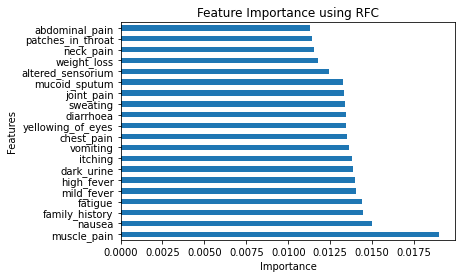

In [0]:
###FINDING FEATURE IMPORTANCE USING RANDOM FOREST CLASSIFIER WITH HYPER PARAMETER TUNING###
rfc_mod = RandomForestClassifier(n_estimators=100,random_state=42, class_weight='balanced').fit(train_X, train_y)
feat_importances = pd.Series(rfc_mod.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')
plt.title("Feature Importance using RFC")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show() 


## Using Recursive Feature Elimination

In [0]:
from sklearn.feature_selection import RFE

In [0]:
rfe = RFE(rfc_mod, 20)
rfe.fit(train_X,train_y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight='balanced', criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=42,
                                     verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [0]:
train_X.columns[rfe.support_]

Index(['itching', 'chills', 'joint_pain', 'stomach_pain', 'vomiting',
       'fatigue', 'weight_loss', 'high_fever', 'sweating', 'headache',
       'nausea', 'loss_of_appetite', 'abdominal_pain', 'diarrhoea',
       'yellowing_of_eyes', 'malaise', 'chest_pain', 'neck_pain', 'depression',
       'muscle_pain'],
      dtype='object')

In [0]:
colm = train_X.columns[rfe.support_]

In [0]:
rfc_mod.fit(train_X[colm],train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rfc2 = rfc_mod.predict(val_X[colm])
y_pred_rfc2

array(['Urinary tract infection', 'Urinary tract infection',
       'Hyperthyroidism', ..., 'Hepatitis D', 'Hypertension ',
       'Urinary tract infection'], dtype=object)

In [0]:
print("Accuracy Score:", accuracy_score(y_pred_rfc2, val_y))
print("F1 Score :",f1_score(y_pred_rfc2,val_y,average = "weighted"))
print('Report:\n',classification_report(val_y, y_pred_rfc2))
print('Confusion Matrix: \n',confusion_matrix(val_y, y_pred_rfc2))

Accuracy Score: 0.8565270935960592
F1 Score : 0.8742839159049732
Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.95      0.97        37
                                   AIDS       0.49      0.93      0.64        42
                                   Acne       0.00      0.00      0.00        42
                    Alcoholic hepatitis       0.83      1.00      0.91        40
                                Allergy       1.00      0.89      0.94        36
                              Arthritis       0.00      0.00      0.00        42
                       Bronchial Asthma       1.00      0.85      0.92        48
                   Cervical spondylosis       0.97      0.89      0.93        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common

In [0]:
y_pred_rfc3 = rfc_mod.predict(X1[colm])
y_pred_rfc3

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Urinary tract infection', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Urinary tract infection',
       '(vertigo) Paroymsal  Positional Vertigo',
       'Urinary tract infection', 'Urinary tract infection', 'Psoriasis',
       'AIDS'], dtype=object)

In [0]:
print("Accuracy Score:", accuracy_score(y_pred_rfc3, y1))
print("F1 Score :",f1_score(y_pred_rfc3,y1,average = "weighted"))
print('Report:\n',classification_report(y1, y_pred_rfc3))
print('Confusion Matrix: \n',confusion_matrix(y1, y_pred_rfc3))

Accuracy Score: 0.9024390243902439
F1 Score : 0.9252032520325204
Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       0.50      1.00      0.67         1
                                   Acne       0.00      0.00      0.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       0.00      0.00      0.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common

### Decision Tree Classifier

In [0]:
dectre_mod = DecisionTreeClassifier(random_state=42, class_weight='balanced').fit(train_X,train_y)

In [0]:
y_pred_dectre = dectre_mod.predict(val_X)
y_pred_dectre

array(['Acne', 'Acne', 'Hyperthyroidism', ..., 'Hepatitis D',
       'Hypertension ', 'Arthritis'], dtype=object)

In [0]:
y_pred_dectre1 = dectre_mod.predict(X1)
y_pred_dectre1

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [0]:
print("Accuracy Score:", accuracy_score(y_pred_dectre, val_y))
print("F1 Score :",f1_score(y_pred_dectre,val_y,average = "weighted"))
print('Report:\n',classification_report(val_y, y_pred_dectre))
print('Confusion Matrix: \n',confusion_matrix(val_y, y_pred_dectre))

Accuracy Score: 1.0
F1 Score : 1.0
Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00    

In [0]:
print("Accuracy Score:", accuracy_score(y_pred_dectre1, y1))
print("F1 Score :",f1_score(y_pred_dectre1,y1,average = "weighted"))
print('Report:\n',classification_report(y1, y_pred_dectre1))
print('Confusion Matrix: \n',confusion_matrix(y1, y_pred_dectre1))

Accuracy Score: 1.0
F1 Score : 1.0
Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00    

## Feature importance according to Decision Tree Classifier

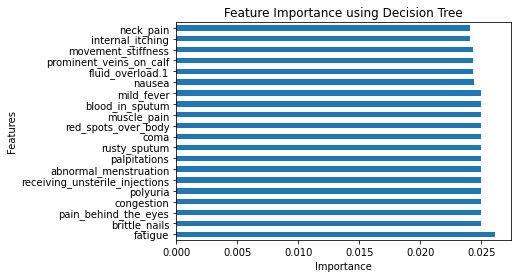

In [0]:
###FINDING FEATURE IMPORTANCE USING RANDOM FOREST CLASSIFIER WITH HYPER PARAMETER TUNING###
feat_importances = pd.Series(dectre_mod.feature_importances_, index=train_X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')
plt.title("Feature Importance using Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show() 


## Using Recursive Feature Elimination

In [0]:
rfe = RFE(dectre_mod, 20)
rfe.fit(train_X,train_y)

RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                                     criterion='gini', max_depth=None,
                                     max_features=None, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     presort='deprecated', random_state=42,
                                     splitter='best'),
    n_features_to_select=20, step=1, verbose=0)

In [0]:
train_X.columns[rfe.support_]

Index(['weight_loss', 'pain_behind_the_eyes', 'mild_fever', 'chest_pain',
       'neck_pain', 'dizziness', 'brittle_nails', 'slurred_speech',
       'movement_stiffness', 'internal_itching', 'muscle_pain',
       'red_spots_over_body', 'abnormal_menstruation', 'increased_appetite',
       'rusty_sputum', 'receiving_blood_transfusion', 'stomach_bleeding',
       'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf'],
      dtype='object')

In [0]:
col = train_X.columns[rfe.support_]
col

Index(['weight_loss', 'pain_behind_the_eyes', 'mild_fever', 'chest_pain',
       'neck_pain', 'dizziness', 'brittle_nails', 'slurred_speech',
       'movement_stiffness', 'internal_itching', 'muscle_pain',
       'red_spots_over_body', 'abnormal_menstruation', 'increased_appetite',
       'rusty_sputum', 'receiving_blood_transfusion', 'stomach_bleeding',
       'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf'],
      dtype='object')

In [0]:
dectre_mod.fit(train_X[col],train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dectre2 = dectre_mod.predict(val_X[col])
y_pred_dectre2

array(['Fungal infection', 'Fungal infection', 'Hyperthyroidism', ...,
       'Fungal infection', 'Hypertension ', 'Arthritis'], dtype=object)

In [0]:
y_pred_dectre3 = dectre_mod.predict(X1[col])
y_pred_dectre3 

array(['Fungal infection', 'Fungal infection', 'Heart attack',
       'Fungal infection', 'Fungal infection', 'Peptic ulcer diseae',
       'Fungal infection', 'Diabetes ', 'Fungal infection',
       'Fungal infection', 'Hypertension ', 'Fungal infection',
       'Cervical spondylosis', 'Fungal infection', 'Jaundice', 'Malaria',
       'Chicken pox', 'Dengue', 'Fungal infection', 'hepatitis A',
       'Hepatitis B', 'Fungal infection', 'Fungal infection',
       'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis',
       'Common Cold', 'Pneumonia', 'Fungal infection', 'Heart attack',
       'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism',
       'Hypoglycemia', 'Osteoarthristis', 'Arthritis', 'Fungal infection',
       'Fungal infection', 'Fungal infection', 'Fungal infection',
       'Fungal infection'], dtype=object)

In [0]:
print("Accuracy Score:", accuracy_score(y_pred_dectre2, val_y))
print("F1 Score :",f1_score(y_pred_dectre2,val_y,average = "weighted"))
print('Report:\n',classification_report(val_y, y_pred_dectre2))
print('Confusion Matrix: \n',confusion_matrix(val_y, y_pred_dectre2))

Accuracy Score: 0.5387931034482759
F1 Score : 0.5587830365028352
Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00        37
                                   AIDS       0.00      0.00      0.00        42
                                   Acne       0.00      0.00      0.00        42
                    Alcoholic hepatitis       1.00      0.90      0.95        40
                                Allergy       0.00      0.00      0.00        36
                              Arthritis       1.00      0.90      0.95        42
                       Bronchial Asthma       0.00      0.00      0.00        48
                   Cervical spondylosis       1.00      0.81      0.90        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       0.00      0.00      0.00        31
                            Common

In [0]:
print("Accuracy Score:", accuracy_score(y_pred_dectre3, y1))
print("F1 Score :",f1_score(y_pred_dectre3,y1,average = "weighted"))
print('Report:\n',classification_report(y1, y_pred_dectre3))
print('Confusion Matrix: \n',confusion_matrix(y1, y_pred_dectre3))

Accuracy Score: 0.5609756097560976
F1 Score : 0.590928540864356
Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00         1
                                   AIDS       0.00      0.00      0.00         1
                                   Acne       0.00      0.00      0.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       0.00      0.00      0.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       0.00      0.00      0.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       0.00      0.00      0.00         1
                            Common 

### Logistic Regression

In [0]:
logreg_mod = LogisticRegression(random_state=42, solver='lbfgs', class_weight='balanced').fit(train_X,train_y)

In [0]:
y_pred_logreg = logreg_mod.predict(val_X)
y_pred_logreg

array(['Acne', 'Acne', 'Hyperthyroidism', ..., 'Hepatitis D',
       'Hypertension ', 'Arthritis'], dtype=object)

In [0]:
y_pred_logreg1 = logreg_mod.predict(X1)
y_pred_logreg1

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [0]:
print("Accuracy Score:", accuracy_score(y_pred_logreg, val_y))
print("F1 Score :",f1_score(y_pred_logreg,val_y,average = "weighted"))
print('Report:\n',classification_report(val_y, y_pred_logreg))
print('Confusion Matrix: \n',confusion_matrix(val_y, y_pred_logreg)) 

Accuracy Score: 1.0
F1 Score : 1.0
Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00    

In [0]:
print("Accuracy Score:", accuracy_score(y_pred_logreg1, y1))
print("F1 Score :",f1_score(y_pred_logreg1,y1,average = "weighted"))
print('Report:\n',classification_report(y1, y_pred_logreg1))
print('Confusion Matrix: \n',confusion_matrix(y1, y_pred_logreg1))

Accuracy Score: 1.0
F1 Score : 1.0
Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00    

## Using Recursive Feature Elimination

In [0]:
rfe = RFE(logreg_mod, 20)
rfe.fit(train_X,train_y)

RFE(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [0]:
from sklearn.feature_selection import RFE

In [0]:
train_X.columns[rfe.support_]

Index(['itching', 'skin_rash', 'chills', 'joint_pain', 'vomiting',
       'burning_micturition', 'fatigue', 'weight_loss', 'cough', 'high_fever',
       'sweating', 'headache', 'nausea', 'loss_of_appetite', 'abdominal_pain',
       'diarrhoea', 'chest_pain', 'stiff_neck', 'loss_of_balance',
       'irritability'],
      dtype='object')

In [0]:
cols = train_X.columns[rfe.support_]
cols

Index(['itching', 'skin_rash', 'chills', 'joint_pain', 'vomiting',
       'burning_micturition', 'fatigue', 'weight_loss', 'cough', 'high_fever',
       'sweating', 'headache', 'nausea', 'loss_of_appetite', 'abdominal_pain',
       'diarrhoea', 'chest_pain', 'stiff_neck', 'loss_of_balance',
       'irritability'],
      dtype='object')

In [0]:
logreg_mod.fit(train_X[cols],train_y)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_logreg2 = logreg_mod.predict(val_X[cols])
y_pred_logreg2

array(['Acne', 'Acne', 'Hyperthyroidism', ..., 'Hepatitis D',
       'Hypertension ', 'Arthritis'], dtype=object)

In [0]:
for i in y_pred_logreg2:
    print(i)

Acne
Acne
Hyperthyroidism
AIDS
Chronic cholestasis
Hypertension 
Hypoglycemia
Arthritis
Hepatitis B
Migraine
Urinary tract infection
Diabetes 
Hepatitis D
Psoriasis
Alcoholic hepatitis
Alcoholic hepatitis
Dimorphic hemmorhoids(piles)
Hepatitis E
Diabetes 
Cervical spondylosis
Bronchial Asthma
hepatitis A
Hepatitis B
Bronchial Asthma
Allergy
Hepatitis C
Pneumonia
Migraine
Hypothyroidism
Migraine
Chronic cholestasis
Hepatitis B
Gastroenteritis
Hepatitis D
Varicose veins
Migraine
Jaundice
Drug Reaction
Pneumonia
Urinary tract infection
Varicose veins
(vertigo) Paroymsal  Positional Vertigo
Hypertension 
Diabetes 
Jaundice
Gastroenteritis
Hypoglycemia
Hepatitis B
Psoriasis
Psoriasis
Heart attack
Tuberculosis
Varicose veins
Allergy
Hyperthyroidism
Hepatitis C
Typhoid
Common Cold
Urinary tract infection
Peptic ulcer diseae
Hypoglycemia
Hyperthyroidism
Tuberculosis
Heart attack
(vertigo) Paroymsal  Positional Vertigo
Hypothyroidism
Paralysis (brain hemorrhage)
AIDS
(vertigo) Paroymsal  Positi

In [0]:
print("Accuracy Score:", accuracy_score(y_pred_logreg2, val_y))
print("F1 Score :",f1_score(y_pred_logreg2,val_y,average = "weighted"))
print('Report:\n',classification_report(val_y, y_pred_logreg2))
print('Confusion Matrix: \n',confusion_matrix(val_y, y_pred_logreg2))

Accuracy Score: 0.9605911330049262
F1 Score : 0.9598421042237424
Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       0.89      0.93      0.91        42
                                   Acne       0.85      0.95      0.90        42
                    Alcoholic hepatitis       0.83      1.00      0.91        40
                                Allergy       1.00      0.89      0.94        36
                              Arthritis       1.00      0.90      0.95        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common

In [0]:
y_pred_logreg3 = logreg_mod.predict(X1[cols])
y_pred_logreg3

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [0]:
for i in y_pred_logreg3:
    print(i)

Fungal infection
Allergy
GERD
Chronic cholestasis
Drug Reaction
Peptic ulcer diseae
AIDS
Diabetes 
Gastroenteritis
Bronchial Asthma
Hypertension 
Migraine
Cervical spondylosis
Paralysis (brain hemorrhage)
Jaundice
Malaria
Chicken pox
Dengue
Typhoid
hepatitis A
Hepatitis B
Hepatitis C
Hepatitis D
Hepatitis E
Alcoholic hepatitis
Tuberculosis
Common Cold
Pneumonia
Dimorphic hemmorhoids(piles)
Heart attack
Varicose veins
Hypothyroidism
Hyperthyroidism
Hypoglycemia
Osteoarthristis
Arthritis
(vertigo) Paroymsal  Positional Vertigo
Acne
Urinary tract infection
Psoriasis
Impetigo


In [0]:
print("Accuracy Score:", accuracy_score(y_pred_logreg3, y1))
print("F1 Score :",f1_score(y_pred_logreg3,y1,average = "weighted"))
print('Report:\n',classification_report(y1, y_pred_logreg3))
print('Confusion Matrix: \n',confusion_matrix(y1, y_pred_logreg3))

Accuracy Score: 1.0
F1 Score : 1.0
Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00    

In [0]:
print(y_pred_logreg3.tolist())
print(y1)

print(len(y_pred_logreg3))
print(len(y1))

['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo']
0                            Fungal infection
1                                     Allergy
2                                        GERD
3                         Chronic cholestasis
4                               Drug Reaction
5                         Peptic ulcer diseae
6                    

In [0]:
print(len(np.unique(val_y.tolist())))

41


In [0]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

def multiclass_roc_auc_score(y1, y_pred_logreg1, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y1)
    y1 = lb.transform(y1)
    y_pred_logreg1 = lb.transform(y_pred_logreg1)
    return roc_auc_score(y1, y_pred_logreg1, average=average)
auc = multiclass_roc_auc_score(y1, y_pred_logreg1, average="macro")
print("Area under curve : ", auc)

Area under curve :  1.0


In [0]:
print(len(val_y))

1624


In [0]:

# for validation data
app = val_y.append(pd.Series(y_pred_logreg2))
dumm = pd.get_dummies(app)
dumm,dummpred = dumm[:1624],dumm[1624:]
print(len(dumm),len(dummpred))


# for testing data
# app = y1.append(pd.Series(y_pred_logreg3))
# dumm = pd.get_dummies(app)
# dumm,dummpred = dumm[:41],dumm[41:]
# print(len(dumm),len(dummpred))

1624 1624


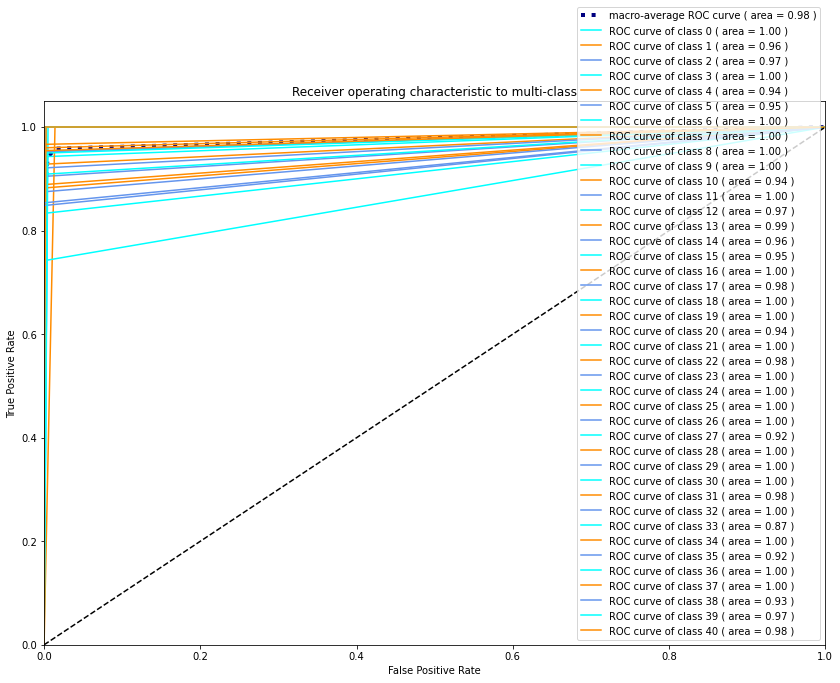

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle



from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


n_classes = 41

ys = dumm.values
y_score = dummpred.values
# Learn to predict each class against the other

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ys[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes



fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(14,10))


plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve ( area = {0:0.2f} )'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(41), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} ( area = {1:0.2f} )'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [0]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
data = { 'Metric' : ['Accuracy','F1 Score','Recall','Precision'],
        'RFC using RFE': [accuracy_score(y_pred_rfc3, y1),f1_score(y_pred_rfc3,y1,average = "weighted"),recall_score(y1, y_pred_rfc3,average = "weighted"),precision_score(y1, y_pred_rfc3,average = "weighted")],
        'Decision Tree using RFE':[accuracy_score(y_pred_dectre3, y1),f1_score(y_pred_dectre3,y1,average = "weighted"),recall_score(y1, y_pred_dectre3,average = "weighted"),precision_score(y1, y_pred_dectre3,average = "weighted")],
        'Logistic Regression using RFE':[accuracy_score(y_pred_logreg3, y1),f1_score(y_pred_logreg3,y1,average = "weighted"),recall_score(y1, y_pred_logreg3,average = "weighted"),precision_score(y1, y_pred_logreg3,average = "weighted")]
                 }
df_compare = pd.DataFrame(data,columns=['Metric','RFC using RFE','Decision Tree using RFE','Logistic Regression using RFE'])
df_compare

Metric  ...  Logistic Regression using RFE
0   Accuracy  ...                            1.0
1   F1 Score  ...                            1.0
2     Recall  ...                            1.0
3  Precision  ...                            1.0

[4 rows x 4 columns]

## Conclusion:
* Logistic regression with one vs rest gives the best accuracy in both dataset ie Validation data and Testing Data.
* Feature importance obtained from Feature importance according to Random Forest classifier is alomst same as features obtained from logistic regression using RFE.